In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
from sklearn.svm import SVC

In [4]:
iris = datasets.load_iris()

In [7]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
X = iris["data"][:,(2,3)]

In [11]:
y = iris["target"]

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
setosa_or_versicolor = (y==0)|(y==1)

In [16]:
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [21]:
svm_clf = SVC(kernel = "linear",C =float("inf"))

In [22]:
svm_clf.fit(X,y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

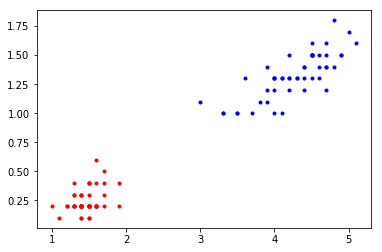

In [31]:
plt.plot(X[:,0][y==1],X[:,1][y==1],"b.")
plt.plot(X[:,0][y==0],X[:,1][y==0],"r.")

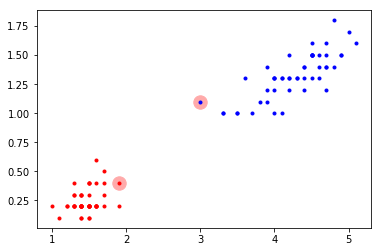

In [33]:
svs = svm_clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
plt.plot(X[:,0][y==1],X[:,1][y==1],"b.")
plt.plot(X[:,0][y==0],X[:,1][y==0],"r.")

In [34]:
def svm_plot(svm_clf,xmin,xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin,xmax,200)
    #w0x0 + w1x1 + b = 0
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)    

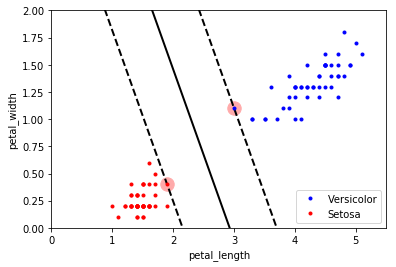

In [38]:
svm_plot(svm_clf,0,5.5)
plt.plot(X[:,0][y==1],X[:,1][y==1],"b.",label="Versicolor")
plt.plot(X[:,0][y==0],X[:,1][y==0],"r.",label="Setosa")
plt.axis([0,5.5,0,2])
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()
plt.show()